✅ Step 1: Setting Up Your Environment
python
Copy
Edit
# Install and import required libraries



In [7]:

!pip install yfinance

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

✅ Step 2: Organizing Your Notebook
Use structured headings for:

Data Collection

Preprocessing

Modeling

Evaluation

Visualization

In [8]:
# Data Collection
stock_data = yf.download('AAPL', start='2015-01-01', end='2023-12-31')
stock_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288580,24.757334,23.848706,24.746226,212818400
2015-01-05,23.604336,24.137516,23.417723,24.057539,257142000
2015-01-06,23.606558,23.866483,23.244438,23.668762,263188400
2015-01-07,23.937571,24.037541,23.704304,23.815383,160423600
2015-01-08,24.857306,24.915067,24.148620,24.266365,237458000


In [9]:
# Preprocessing
stock_data['Target'] = stock_data['Close'].shift(-1)
stock_data.dropna(inplace=True)

# Feature & Target Selection
X = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = stock_data['Target']


✅ Step 3: Implementing Your Solution
Split the data and train your model:

In [10]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2529)


In [11]:
# Model Selection & Training
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
# Predictions
y_pred = model.predict(X_test)


✅ Step 4: Documenting Your Work
Add markdowns and code comments throughout to explain:

markdown
Copy
Edit
### Project: Stock Market Closing Price Prediction
- Goal: Predict the next day's closing price of Apple stock.
- Dataset: Fetched from Yahoo Finance using `yfinance`
- Model Used: Linear Regression

In [13]:
# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("Root Mean Squared Error:", rmse)


R² Score: 0.9989595588051683
Root Mean Squared Error: 1.8170931882680397


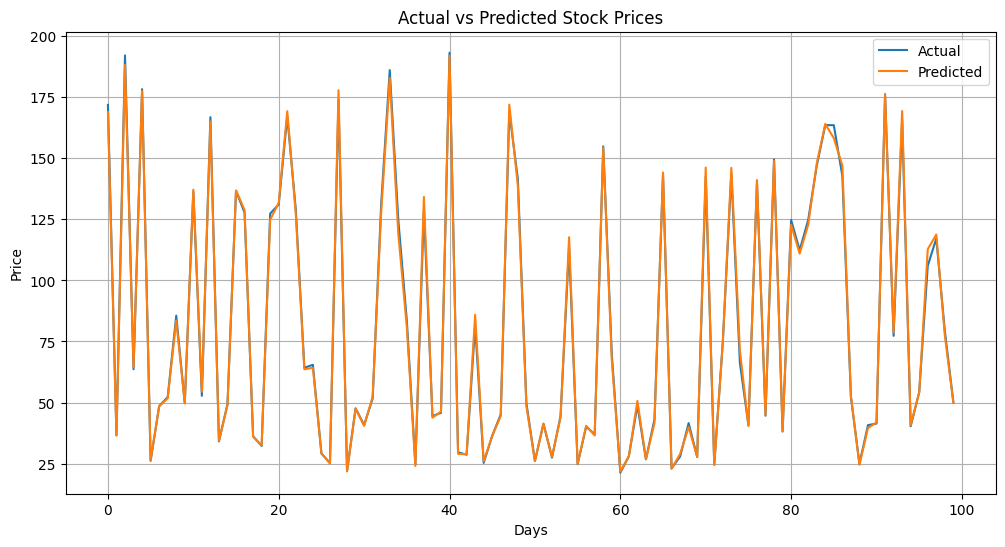

In [14]:
# Visualization
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
